In [2]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

%matplotlib inline

In [3]:
trawlers_df = pd.read_csv(r"C:\Users\adars\Downloads\trawlers.csv")
trawlers_df.head(10)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.252340e+12,1.325376e+09,0.0,0.0,0.0,153.0,52.458649,4.581200,-1.0,gfw
1,1.252340e+12,1.325378e+09,0.0,0.0,0.0,153.0,52.458668,4.581167,-1.0,gfw
2,1.252340e+12,1.325379e+09,0.0,0.0,0.0,153.0,52.458633,4.581183,-1.0,gfw
3,1.252340e+12,1.325380e+09,0.0,0.0,0.0,153.0,52.458649,4.581234,-1.0,gfw
4,1.252340e+12,1.325381e+09,0.0,0.0,0.0,153.0,52.458649,4.581183,-1.0,gfw
5,1.252340e+12,1.325382e+09,0.0,0.0,0.0,18.0,52.458698,4.581217,-1.0,gfw
6,1.252340e+12,1.325383e+09,0.0,0.0,0.0,18.0,52.458717,4.581200,-1.0,gfw
7,1.252340e+12,1.325384e+09,0.0,0.0,0.0,18.0,52.458683,4.581217,-1.0,gfw
8,1.252340e+12,1.325385e+09,0.0,0.0,0.0,18.0,52.458668,4.581183,-1.0,gfw
9,1.252340e+12,1.325386e+09,0.0,0.0,0.0,18.0,52.458683,4.581183,-1.0,gfw


In [4]:
# datatypes of each column 

trawlers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4369101 entries, 0 to 4369100
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   mmsi                 float64
 1   timestamp            float64
 2   distance_from_shore  float64
 3   distance_from_port   float64
 4   speed                float64
 5   course               float64
 6   lat                  float64
 7   lon                  float64
 8   is_fishing           float64
 9   source               object 
dtypes: float64(9), object(1)
memory usage: 333.3+ MB


In [5]:
# Statistical data analysis


trawlers_df.describe()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing
count,4.369101e+06,4.369101e+06,4.369101e+06,4.369101e+06,4.369023e+06,4.369023e+06,4.369101e+06,4.369101e+06,4.369101e+06
mean,1.578952e+14,1.426220e+09,7.819802e+04,1.496648e+05,2.972401e+00,1.744043e+02,3.266757e+01,4.927771e+00,-9.449078e-01
std,9.494779e+13,3.876472e+07,2.040747e+05,3.279532e+05,4.105081e+00,1.154701e+02,3.837240e+01,8.127552e+01,2.844518e-01
min,1.252340e+12,1.325376e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-8.498024e+01,-1.799996e+02,-1.000000e+00
25%,7.726193e+13,1.397205e+09,0.000000e+00,2.236013e+03,0.000000e+00,6.480000e+01,3.623107e+01,-8.288531e+00,-1.000000e+00
50%,1.753874e+14,1.434811e+09,4.242537e+03,3.605462e+04,1.500000e+00,1.870000e+02,5.209994e+01,4.584417e+00,-1.000000e+00
75%,2.402260e+14,1.458922e+09,5.578393e+04,9.608094e+04,4.500000e+00,2.760000e+02,5.463578e+01,1.432063e+01,-1.000000e+00
max,2.775153e+14,1.480032e+09,3.257453e+06,1.245220e+07,1.023000e+02,5.110000e+02,8.461642e+01,1.799934e+02,1.000000e+00


In [6]:
trawlers_df.shape

#we have 166243 rows and 10 columns

(4369101, 10)

In [7]:
#checking for na values

trawlers_df.isna().sum()


mmsi                    0
timestamp               0
distance_from_shore     0
distance_from_port      0
speed                  78
course                 78
lat                     0
lon                     0
is_fishing              0
source                  0
dtype: int64

In [8]:
#check for duplicate rows
duplicates = trawlers_df.duplicated()
trawlers_df[duplicates].head()


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source


In [9]:
#Droping duplicate rows
trawlers_df = trawlers_df.drop_duplicates()
trawlers_df.shape


(4369101, 10)

In [10]:
#Number of unique vessels under observation
trawlers_df['mmsi'].unique().shape


(49,)

In [11]:
#Number of data points for each vessel

trawlers_df['mmsi'].value_counts()


2.402260e+14    544064
2.748501e+14    200525
2.073022e+14    177119
5.020143e+12    170132
1.214265e+14    159639
2.690503e+14    154564
2.691196e+14    153481
1.924269e+14    139538
2.684335e+14    139185
1.252340e+12    134288
8.681774e+13    129460
3.985941e+13    128469
2.533834e+14    118583
5.110130e+13    116535
8.681844e+12    116083
1.753874e+14    114334
8.042345e+13    102263
5.145483e+12     90782
2.746838e+14     87623
4.083411e+13     76532
1.641467e+14     74323
7.726193e+13     70002
2.187965e+14     69574
1.985955e+13     65772
1.356584e+14     64618
2.676099e+14     62944
6.960986e+13     61443
1.838128e+14     60740
3.491170e+13     59921
2.311543e+14     57298
8.305062e+13     53421
7.835965e+13     53396
1.217392e+14     50411
2.226561e+14     49415
1.397611e+14     48348
2.189971e+14     47542
1.100141e+14     44703
1.867463e+14     43410
1.439069e+14     42660
1.696186e+14     37777
2.775153e+14     35126
1.414316e+14     30876
4.893953e+13     30640
1.124532e+1

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mmsi', ylabel='count'>

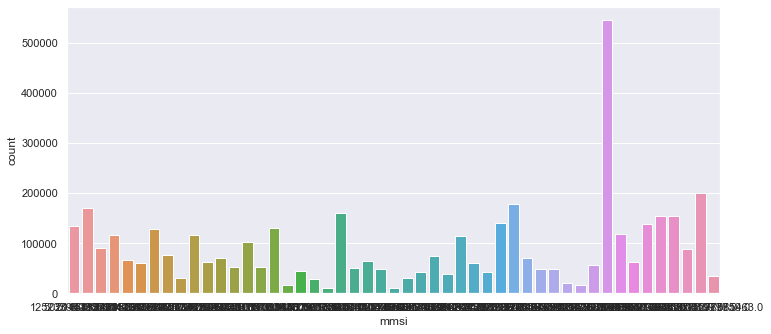

In [12]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.countplot(trawlers_df['mmsi'])


In [13]:
#Coverting Unix time to readable date time format
    
date_time = pd.to_datetime(trawlers_df['timestamp'],unit='s')
print(date_time)


0         2012-01-01 00:00:38
1         2012-01-01 00:33:13
2         2012-01-01 00:43:14
3         2012-01-01 00:59:55
4         2012-01-01 01:16:00
                  ...        
4369096   2016-11-24 23:36:39
4369097   2016-11-24 23:38:37
4369098   2016-11-24 23:40:39
4369099   2016-11-24 23:41:38
4369100   2016-11-24 23:43:36
Name: timestamp, Length: 4369101, dtype: datetime64[ns]


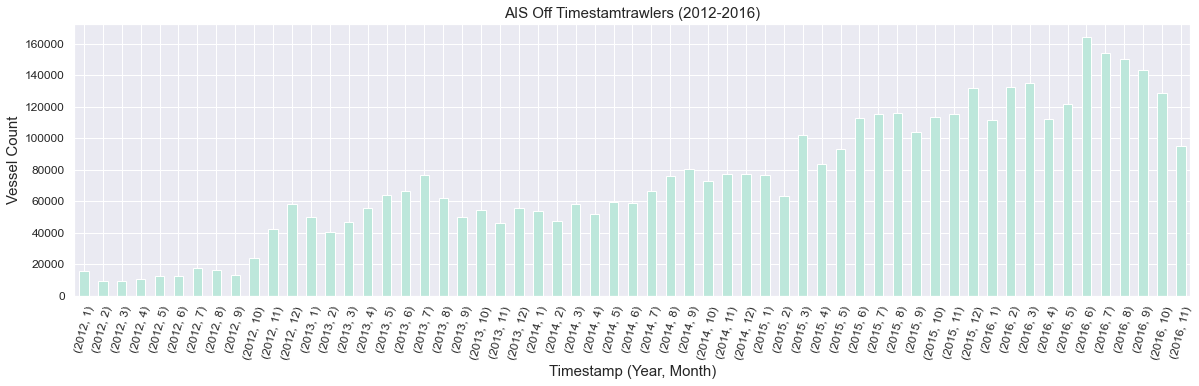

In [14]:
# Visualize the distribution of AIS off timestamtrawlers across 2-year period

plt.figure(figsize=(20,5))
# Group dataframe by month and year

timing = date_time.groupby([date_time.dt.year,
                                              date_time.dt.month])
ax = timing.count().plot(kind="bar", rot=75, cmap='icefire')
ax.set_xlabel("Timestamp (Year, Month)", fontsize=15)
ax.set_ylabel("Vessel Count", fontsize=15)
ax.set_title("AIS Off Timestamtrawlers (2012-2016)", fontsize=15)
ax.tick_params(labelsize=12);


In [16]:

# Time range of the dataset

pd.to_datetime(trawlers_df['timestamp'],unit='s').describe()

#Start date : 2012-01-03 21:06:29
#End date : 2016-11-24 23:58:30


C:\Users\adars\AppData\Local\Temp/ipykernel_6840/830289452.py:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  pd.to_datetime(trawlers_df['timestamp'],unit='s').describe()


count                 4369101
unique                4188604
top       2013-07-09 20:53:41
freq                       64
first     2012-01-01 00:00:38
last      2016-11-24 23:59:22
Name: timestamp, dtype: object

In [17]:
#Remove Vessels at port

#Vessels at shore
at_shore = trawlers_df.loc[(trawlers_df['distance_from_shore'] == 0.00)]
print(f"{len(at_shore)} vessels (45% of observations) have timestamtrawlers at shore.")


1885633 vessels (45% of observations) have timestamtrawlers at shore.


In [18]:
#Vessels at port
at_port = trawlers_df.loc[(trawlers_df['distance_from_port'] == 0.00)]
print(f"{len(at_port)} vessels have timestamtrawlers at port.")

print(at_port)


169444 vessels have timestamtrawlers at port.
                 mmsi     timestamp  distance_from_shore  distance_from_port  \
0        1.252340e+12  1.325376e+09                  0.0                 0.0   
1        1.252340e+12  1.325378e+09                  0.0                 0.0   
2        1.252340e+12  1.325379e+09                  0.0                 0.0   
3        1.252340e+12  1.325380e+09                  0.0                 0.0   
4        1.252340e+12  1.325381e+09                  0.0                 0.0   
...               ...           ...                  ...                 ...   
4343748  1.838128e+14  1.467938e+09                  0.0                 0.0   
4350091  1.838128e+14  1.469904e+09                  0.0                 0.0   
4350092  1.838128e+14  1.469904e+09                  0.0                 0.0   
4357650  1.838128e+14  1.472137e+09                  0.0                 0.0   
4368746  1.838128e+14  1.479967e+09                  0.0                 0

In [19]:
#Droping vessels at port
trawlers_df.drop(at_port['distance_from_port'] ,axis=0, inplace=True)


In [20]:
trawlers_df.loc[trawlers_df['is_fishing'] > 0, 'is_fishing'] = 1

In [21]:
trawlers_df['is_fishing'].value_counts()

-1.0    4191706
 0.0     112999
 1.0      64395
Name: is_fishing, dtype: int64

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_fishing', ylabel='count'>

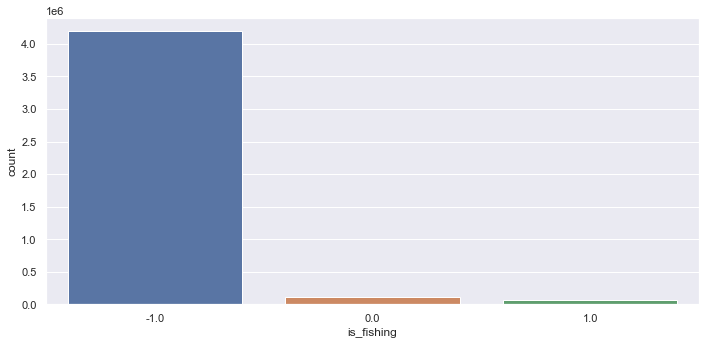

In [22]:
sns.countplot(trawlers_df['is_fishing'])

C:\Users\adars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mmsi', ylabel='count'>

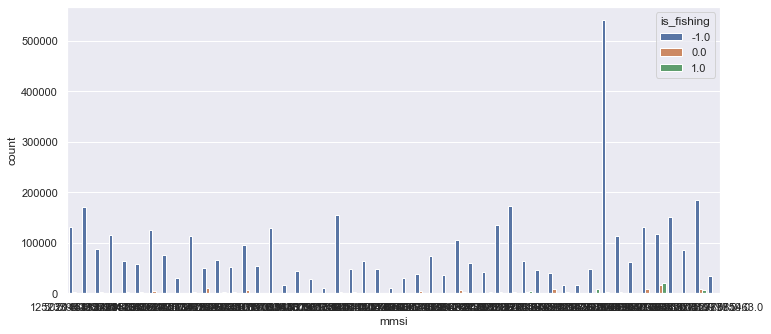

In [23]:
sns.countplot(trawlers_df['mmsi'], hue = trawlers_df['is_fishing'])

In [24]:
#dummy data

print(trawlers_df['mmsi'].unique())


[1.25233980e+12 5.14548325e+12 1.98595477e+13 3.49117011e+13
 5.11012972e+13 6.96098563e+13 7.72619287e+13 7.83596535e+13
 8.04234501e+13 1.08916343e+14 1.12453193e+14 1.16333895e+14
 1.21426487e+14 1.21739171e+14 1.41431601e+14 1.64146741e+14
 1.69618621e+14 1.86746307e+14 1.92426881e+14 2.07302221e+14
 2.18997104e+14 2.24833127e+14 2.29561307e+14 2.40226012e+14
 2.53383409e+14 2.67609942e+14 2.68433469e+14 2.69119641e+14
 2.74683790e+14 2.77515278e+14 1.43906915e+14 1.75387414e+14
 2.18796485e+14 2.22656062e+14 2.31154271e+14 2.69050324e+14
 2.74850146e+14 5.02014314e+12 8.68184448e+12 3.98594065e+13
 4.08341145e+13 4.89395291e+13 8.30506161e+13 8.68177391e+13
 1.10014061e+14 1.35658402e+14 1.39761125e+14 1.41400905e+14
 1.83812835e+14]


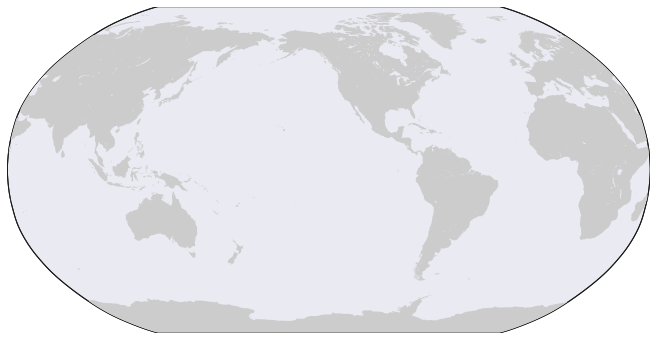

In [25]:
f = trawlers_df.loc[(trawlers_df['mmsi'] == 112940878780541.0)]
plt.figure(figsize=(12,6))
lons, lats = f['lon'].tolist(), f['lat'].tolist()
m = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0, lat_0=0, lon_0=-130)
m.bluemarble()
m.drawmapboundary()
m.fillcontinents()
x, y = m(lons, lats)
m.scatter(x, y, marker='.',color='red')
